In [1]:
import sys
sys.path.append("../")
sys.path.append("../../benchmark/")
import numpy as np
import pandas as pd
import qat.lang.AQASM as qlm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#This cell loads the QLM solver.
#QLMaaS == False -> uses PyLinalg
#QLMaaS == True -> try to use LinAlg (for using QPU as CESGA QLM one)
from QQuantLib.utils.qlm_solver import get_qpu
QLMaaS = False
linalg_qpu = get_qpu(QLMaaS)

Using default qpu


In [3]:
from ae_integration_class import IntegrationAE

In [4]:
def f(x):
    return np.sin(x)
def p(x):
    return x
def MonteCarlo(f, x0, xf, N):
    mc_domain = (xf-x0)*np.random.rand(N) + x0
    mc_integration = (xf-x0) * np.mean(f(mc_domain))
    return mc_integration
def sin_integral(a,b):
    return np.cos(a)-np.cos(b)

0.09793840124793655


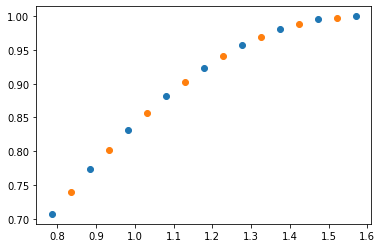

In [5]:
a = np.pi/4.0
b = np.pi/2.0

n = 3
domain_x = np.linspace(a, b, 2**n+1)

delta_x = np.diff(domain_x)
f_x = []
p_x = []
x_ = []
for i in range(1, len(domain_x)):
    step_f = (f(domain_x[i]) + f(domain_x[i-1]))/2.0
    step_p = (p(domain_x[i]) + p(domain_x[i-1]))/2.0
    #print(i)
    f_x.append(step_f)
    p_x.append(step_p)
    x_.append((domain_x[i] + domain_x[i-1])/2.0)
f_x = np.array(f_x)
p_x = np.array(p_x)
x_ = np.array(x_)

plt.plot(domain_x, f(domain_x), 'o')
plt.plot(x_, f_x, 'o')

g_x = f_x*delta_x

normalization= max(g_x)
print(normalization)
#normalization = 1.0
g_norm_x = g_x/normalization

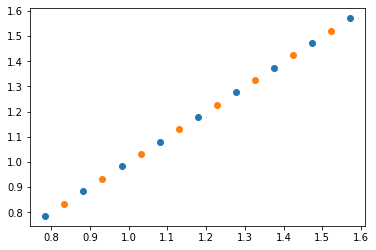

In [6]:
plt.plot(domain_x, p(domain_x), 'o')
plt.plot(x_, p_x, 'o')
norm_p = np.sum(p_x)
p_norm_p = p_x/norm_p

In [7]:
p_norm_p

array([0.08854167, 0.09895833, 0.109375  , 0.11979167, 0.13020833,
       0.140625  , 0.15104167, 0.16145833])

In [8]:
np.sum(p_norm_p)

1.0

In [14]:
np.sum(g_norm_x*g_norm_x)

6.566383775672125

In [10]:
encoding_dict = {
    "array_function": g_norm_x,
    "array_probability": p_norm_p,
    "encoding": 2,
    "multiplexor": True

}

m_k = [i for i in range(12)]

ae_dict = {
    #QPU
    'qpu': linalg_qpu,
    #Multicontrolate decomposition
    'mcz_qlm': False, 
    
    #Amplitude Estimation selection
    'ae_type': 'RQAE',    
    #shots
    'shots': 100,
    
    #MLAE
    'schedule': [
        m_k,
        [100]*len(m_k)
    ],
    'delta' : 1.0e-6,
    'ns' : 10000,
    
    #CQPEAE
    'auxiliar_qbits_number': 10,
    #IQPEAE
    'cbits_number': 6,
    #IQAE & RQAQE
    'epsilon': 0.001,
    #IQAE
    'alpha': 0.05,
    #RQAE
    'gamma': 0.05,
    'q': 1.2
}

In [11]:
ae_dict.update(encoding_dict)

In [12]:
ae_object = IntegrationAE(**ae_dict)

In [13]:
ae_object.run()

,ae,ae_l,ae_u
0,0.958064,0.957718,0.958409


In [ ]:
pdf = ae_object.run()

In [ ]:
pdf

In [ ]:
np.sum(g_norm_x)

In [ ]:
pdf*normalization

In [ ]:
np.sum(g_norm_x)*normalization

In [ ]:
np.sum(p_norm_p*g_norm_x)

In [ ]:
np.sum(p_norm_p*g_x)

In [ ]:
ae_object.solver_ae.alpha

In [ ]:
pdf*normalization

In [ ]:
ae_object.ae_type

In [ ]:
np.sum(g_x)

In [ ]:
ae_object.encode_class.probability

In [ ]:
ae_object.encode_class.run()

In [ ]:
oracle = ae_object.encode_class.oracle
%qatdisplay oracle --depth